In [1]:
import os
os.chdir('C:/Users/raffa/PycharmProjects/PortfolioProject')

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_exploration.data_exploration import *

In [3]:
df = read_sqlite_table('housedata', './data/processed/rome_house_cleaned.db')

In [4]:
df.dtypes

latitude                                     float64
longitude                                    float64
price                                        float64
buildingYear                                  object
surface                                        int64
rooms                                         object
bathrooms                                     object
floor                                         object
garage                                         int64
isNew                                          int64
luxury                                         int64
typology                                      object
condition                                     object
armadio a muro                                 int64
arredato                                       int64
balcone                                        int64
caminetto                                      int64
cancello elettrico                             int64
cantina                                       

In [5]:
df.describe()

,latitude,longitude,price,surface,garage,isNew,luxury,armadio a muro,arredato,balcone,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
count,15522.000000,15522.000000,1.552200e+04,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,...,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000,15522.000000
mean,41.895744,12.492159,4.775909e+05,111.132779,0.397822,0.058884,0.115320,0.290298,0.207190,0.608362,...,0.115127,0.023966,0.681420,0.199910,0.031439,0.003737,0.022871,0.018619,0.336812,0.209574
std,0.040559,0.055277,4.206178e+06,92.189492,0.632050,0.235415,0.319418,0.453914,0.405306,0.488132,...,0.319185,0.152948,0.465941,0.399945,0.174507,0.061016,0.149496,0.135179,0.472635,0.407017
min,41.793400,12.375200,7.000000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.867100,12.446500,2.200000e+05,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.896099,12.489500,3.100000e+05,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.927976,12.537800,4.800000e+05,128.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,41.989700,12.614900,5.200000e+08,4000.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# rimozione valori estremi derivanti da erorri nei dati

In [6]:
df.nsmallest(10, 'price', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
10364,41.890202,12.467800,700.0,Pre 1920,20,2,1,2,0,1,...,0,0,0,0,0,0,1,0,0,0
11988,41.925098,12.466600,1590.0,1920-1929,82,3,2,None,0,0,...,0,0,1,1,0,0,0,0,0,0
13223,41.910500,12.552400,8900.0,None,65,4,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5032,41.968811,12.452130,17440.0,None,17,1,2,T,0,0,...,0,0,0,0,0,0,0,0,0,0
4956,41.967800,12.434600,25000.0,1970-1979,30,2,1,S,0,0,...,0,0,0,0,0,0,0,0,0,0
15292,41.895763,12.471569,25000.0,Pre 1920,80,3,2,T,0,0,...,0,0,0,0,0,0,0,0,0,0
4713,41.967602,12.435800,29000.0,1970-1979,30,1,1,S,0,1,...,1,0,1,0,0,0,0,0,0,0
4927,41.967800,12.434600,29000.0,1970-1979,28,1,1,None,0,0,...,1,0,1,0,0,0,0,0,0,0
4453,41.954399,12.397300,30000.0,None,35,1,1,S,0,0,...,0,0,1,0,0,0,0,0,0,0
4841,41.967800,12.434700,32000.0,1960-1969,24,1,1,S,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df = df[df['price']>=25000]

In [8]:
df.nlargest(10, 'price', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
455,41.865299,12.4977,520000000.0,1970-1979,140,4,2,3,1,0,...,1,0,1,1,0,0,0,0,1,0
11135,41.942799,12.4457,15000000.0,1950-1959,2150,5+,3+,None,1,0,...,0,1,1,1,0,0,0,0,1,1
12673,41.918301,12.5029,12000000.0,1930-1939,1400,5+,3+,None,2,0,...,1,1,1,0,0,0,0,1,1,1
15191,41.904099,12.4870,12000000.0,Pre 1920,4000,5+,3+,None,0,0,...,0,0,1,0,0,0,0,0,1,0
15481,41.883701,12.4875,12000000.0,2010-2019,820,5+,3+,None,4,0,...,1,1,1,0,0,0,0,0,1,1
2490,41.879501,12.3859,11000000.0,2010-2019,721,5+,3+,None,2,0,...,0,1,1,0,0,0,0,0,0,1
2290,41.884300,12.3862,9800000.0,1990-1999,1200,5+,3+,None,2,0,...,1,1,1,1,0,0,0,1,1,1
10378,41.884399,12.4731,9800000.0,Pre 1920,500,5+,3+,6,1,0,...,0,0,1,1,0,0,0,0,1,1
14910,41.896099,12.4692,9500000.0,Pre 1920,1550,5+,3+,None,0,0,...,0,0,0,0,0,0,0,0,1,0
14939,41.904900,12.4799,8500000.0,Pre 1920,351,5+,3+,None,0,0,...,1,0,1,1,0,0,0,0,1,1


In [9]:
df = df[df['price']<=10000000]

In [10]:
df.nlargest(10, 'surface', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
15237,41.897598,12.4769,2430000.0,Pre 1920,2740,5+,3,4,0,0,...,0,0,1,0,0,0,0,0,0,0
14336,41.875301,12.5029,4450000.0,1970-1979,2540,5+,3+,None,2,0,...,0,1,1,0,0,0,0,0,1,1
4830,41.957001,12.4579,1950000.0,1980-1989,1920,5+,3+,None,1,0,...,1,1,1,1,0,0,0,1,1,1
10757,41.895901,12.4526,2000000.0,None,1800,5+,3,None,0,0,...,0,0,0,0,0,0,0,1,1,0
14910,41.896099,12.4692,9500000.0,Pre 1920,1550,5+,3+,None,0,0,...,0,0,0,0,0,0,0,0,1,0
11024,41.952000,12.4456,3800000.0,1960-1969,1433,5+,3+,None,2,0,...,0,0,0,0,0,0,0,1,1,0
9613,41.869801,12.4389,2480000.0,1900-1909,1317,5+,3+,None,2,0,...,0,0,0,0,0,0,0,0,1,0
1971,41.852798,12.3807,1390000.0,1900-1909,1200,5+,1,None,0,0,...,0,0,0,0,0,0,0,0,0,0
2290,41.884300,12.3862,9800000.0,1990-1999,1200,5+,3+,None,2,0,...,1,1,1,1,0,0,0,1,1,1
11451,41.945599,12.4639,3400000.0,1900-1909,1200,5+,3+,None,2,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
df = df[df['surface']<240700]

In [12]:
df.nsmallest(10, 'surface', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
8001,41.879398,12.5674,120000.0,1950-1959,1,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4446,41.946999,12.3886,125000.0,1960-1969,3,2,1,2,0,0,...,0,0,1,0,0,0,0,0,1,0
12540,41.915699,12.5095,110000.0,1930-1939,10,1,1,T,0,0,...,0,0,0,0,0,0,0,1,0,0
4926,41.965401,12.4568,35000.0,None,12,1,1,S,0,0,...,0,0,0,0,0,0,0,0,0,0
4983,41.967400,12.4341,32000.0,1970-1979,12,1,1,S,0,0,...,1,0,0,0,1,0,0,0,0,0
14871,41.903900,12.4843,210000.0,Pre 1920,12,1,1,6,0,0,...,0,0,1,1,0,0,0,0,0,0
5000,41.968201,12.4357,59000.0,1970-1979,14,1,1,R,0,0,...,1,0,0,0,1,0,0,0,0,0
11105,41.943401,12.4398,59000.0,1970-1979,15,1,1,T,0,0,...,0,0,1,0,0,0,0,0,0,0
11182,41.948700,12.4452,66000.0,1970-1979,15,1,1,T,0,0,...,0,0,0,1,0,0,0,0,0,0
13771,41.894699,12.5154,103000.0,1950-1959,15,1,1,T,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
df = df[df['surface']>3]

In [14]:
df.nsmallest(10, 'surface', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
12540,41.915699,12.5095,110000.0,1930-1939,10,1,1,T,0,0,...,0,0,0,0,0,0,0,1,0,0
4926,41.965401,12.4568,35000.0,None,12,1,1,S,0,0,...,0,0,0,0,0,0,0,0,0,0
4983,41.967400,12.4341,32000.0,1970-1979,12,1,1,S,0,0,...,1,0,0,0,1,0,0,0,0,0
14871,41.903900,12.4843,210000.0,Pre 1920,12,1,1,6,0,0,...,0,0,1,1,0,0,0,0,0,0
5000,41.968201,12.4357,59000.0,1970-1979,14,1,1,R,0,0,...,1,0,0,0,1,0,0,0,0,0
11105,41.943401,12.4398,59000.0,1970-1979,15,1,1,T,0,0,...,0,0,1,0,0,0,0,0,0,0
11182,41.948700,12.4452,66000.0,1970-1979,15,1,1,T,0,0,...,0,0,0,1,0,0,0,0,0,0
13771,41.894699,12.5154,103000.0,1950-1959,15,1,1,T,0,0,...,0,0,1,0,0,0,0,0,0,0
13179,41.909302,12.5396,140000.0,1960-1969,16,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
14089,41.875401,12.5184,79000.0,1930-1939,16,1,1,S,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df['garage'].value_counts()

0    10438
1     4093
2      891
3       62
4       26
Name: garage, dtype: int64

In [16]:
df1 = df.copy()
df1.duplicated().sum()

466

In [17]:
df1 = df1.drop_duplicates(keep='first', inplace=False, ignore_index=True)
df1.shape

(15044, 55)

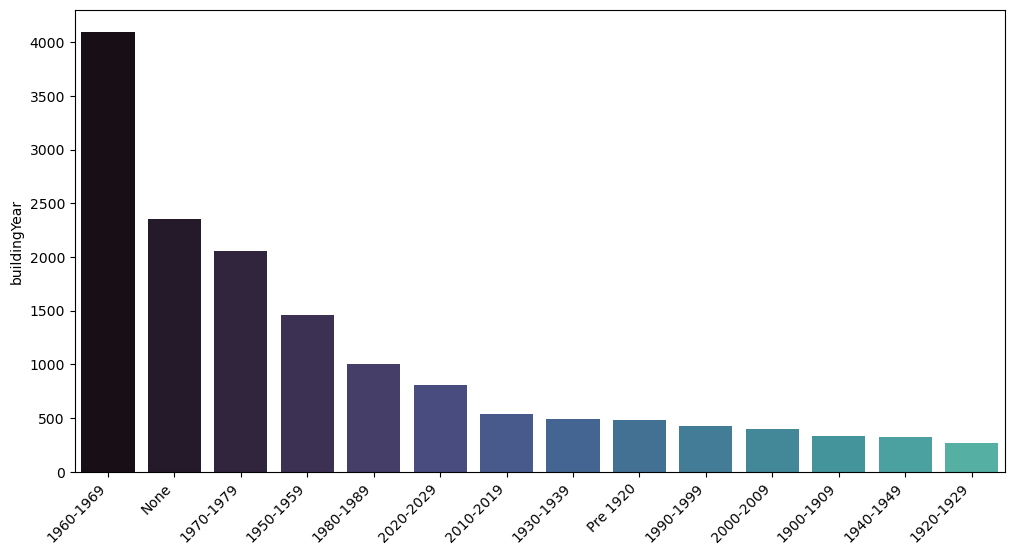

In [25]:
gc = df1['buildingYear'].value_counts().to_frame()
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=gc.index, y=gc.buildingYear, palette=sns.color_palette("mako", n_colors=len(gc) + 4), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Axes: xlabel='surface', ylabel='Count'>

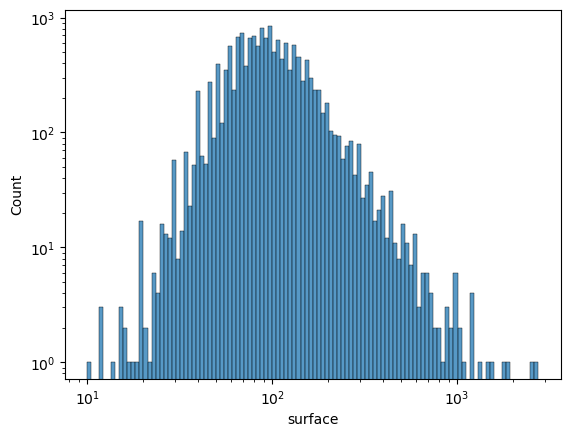

In [26]:
sns.histplot(x=df1['surface'],discrete=False, log_scale=[True,True])

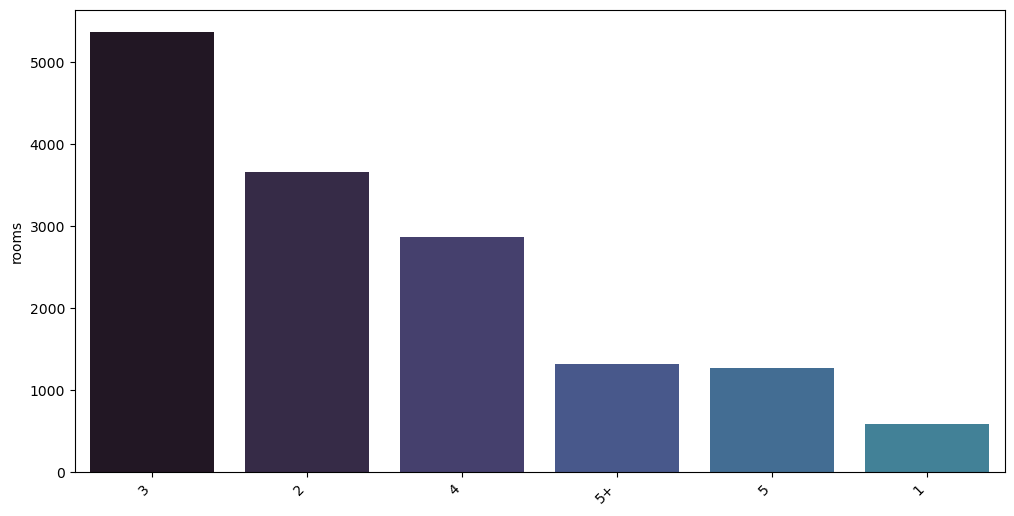

In [29]:
# df1['rooms'].value_counts().plot(kind='bar')
rooms = df1['rooms'].value_counts().to_frame()
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=rooms.index, y=rooms.rooms, palette=sns.color_palette("mako", n_colors=len(rooms) + 4), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Axes: >

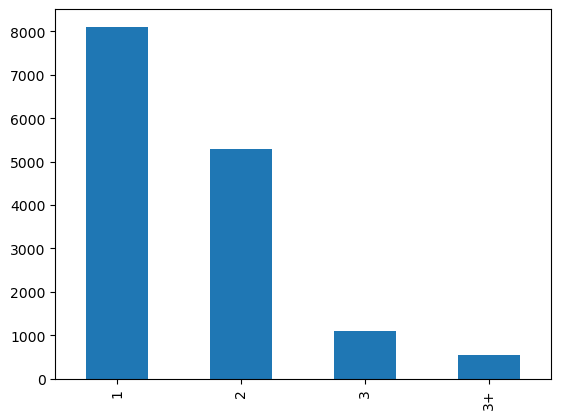

In [30]:
df1['bathrooms'].value_counts().plot(kind='bar')

<Axes: >

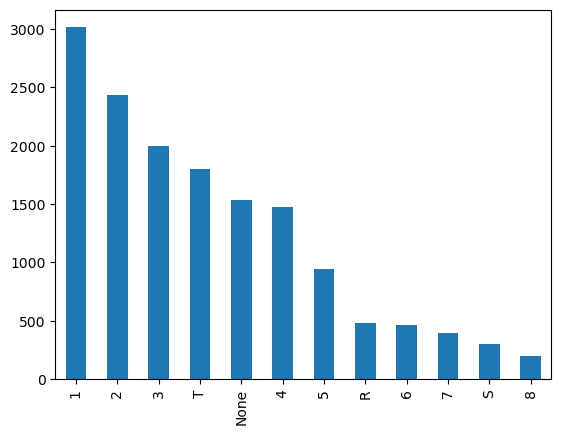

In [31]:
df1['floor'].value_counts().plot(kind='bar')

<Axes: >

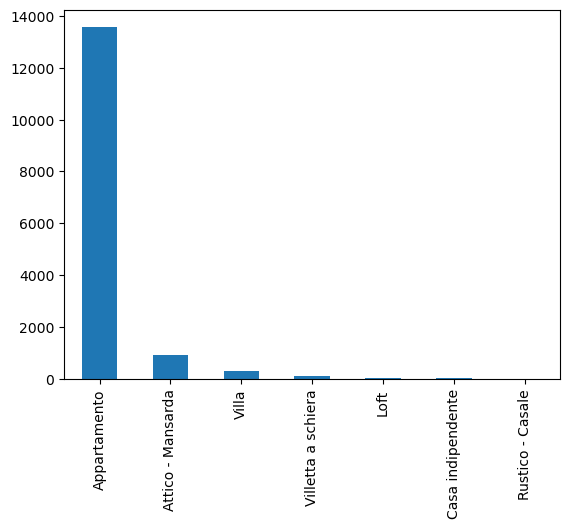

In [32]:
df1['typology'].value_counts().plot(kind='bar')

<Axes: >

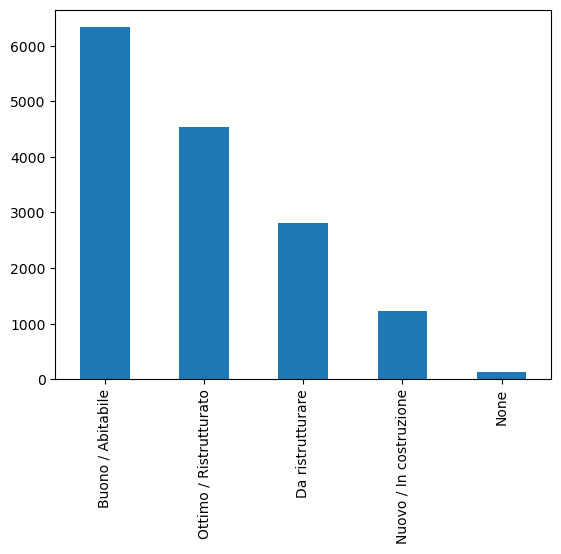

In [33]:
df1['condition'].value_counts().plot(kind='bar')

In [34]:
df1.describe()

,latitude,longitude,price,surface,garage,isNew,luxury,armadio a muro,arredato,balcone,...,parzialmente arredato,piscina,porta blindata,portiere intera giornata,portiere mezza giornata,reception,solo cucina arredata,taverna,terrazza,videocitofono
count,15044.000000,15044.000000,1.504400e+04,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,...,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000,15044.000000
mean,41.895221,12.491632,4.430644e+05,111.197886,0.400957,0.060090,0.116791,0.293871,0.211712,0.607684,...,0.117655,0.024196,0.680072,0.203270,0.032239,0.003855,0.023265,0.018878,0.339139,0.200678
std,0.040509,0.054873,5.099727e+05,85.006776,0.634357,0.237662,0.321181,0.455549,0.408536,0.488283,...,0.322210,0.153661,0.466464,0.402445,0.176639,0.061974,0.150749,0.136099,0.473433,0.400521
min,41.793400,12.375200,2.500000e+04,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.866699,12.446400,2.250000e+05,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.895500,12.488700,3.100000e+05,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.927399,12.536900,4.800000e+05,130.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,41.989700,12.614900,9.800000e+06,2740.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
save_to_sql('./data/processed/rome_house_explored.db', df1, 'housedata')